In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

/Users/suvedharam/Documents/telco-customer-churn/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/suvedharam/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


### Import Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV file into Pandas Dataframe

In [3]:
filename = path+"/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(filename)

### Data Quality Checks

In [4]:
data.shape

(7043, 21)

There 7043 records and 21 columns in the dataset

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- customerID can be dropped as it uniquely identifies a customer and has no effect on Churn rate
- Total Charges can be changed to a float type
- Senior citizen can be changed to a categorical variable.

In [6]:
#Customer ID dropped
new_data = data.drop(columns=['customerID'])
#Total charges changed to numeric
new_data['TotalCharges'] = pd.to_numeric(new_data['TotalCharges'], errors='coerce')
#Senior citizen changed to a categorical variable
new_data['SeniorCitizen'] = new_data['SeniorCitizen'].astype('object')
print(new_data.dtypes)


gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


##### Checking For Null Values

In [7]:
null_values = new_data.isnull().sum()

for column in new_data.columns:
    print(f"Column {column} has {null_values[column]} null values")

Column gender has 0 null values
Column SeniorCitizen has 0 null values
Column Partner has 0 null values
Column Dependents has 0 null values
Column tenure has 0 null values
Column PhoneService has 0 null values
Column MultipleLines has 0 null values
Column InternetService has 0 null values
Column OnlineSecurity has 0 null values
Column OnlineBackup has 0 null values
Column DeviceProtection has 0 null values
Column TechSupport has 0 null values
Column StreamingTV has 0 null values
Column StreamingMovies has 0 null values
Column Contract has 0 null values
Column PaperlessBilling has 0 null values
Column PaymentMethod has 0 null values
Column MonthlyCharges has 0 null values
Column TotalCharges has 11 null values
Column Churn has 0 null values


In [8]:
new_data[np.isnan(new_data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


On looking at the 11 records where Total Charges is NaN, we see tenure is 0 even though the Monthly Charges are available. This suggests that the customer has just signed up and has not completed a billing cycle. Logically in this case, Total Charges shoud have been recorded as 0 but having NaN could mean that the value was not recorded properly and adds some ambiguity which could hamper the training of the model as it does not align with the logic of the rest of the data.

Since the number of records containing this scenario is less they would be dropped from the training set.


In [9]:
new_data[new_data['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Confirming if the tenure is 0 only for these 11 records.

In [10]:
new_data.drop(labels=new_data[new_data['tenure'] == 0].index, axis=0, inplace=True)
new_data[new_data['tenure'] == 0].index

Index([], dtype='int64')

In [11]:
null_values = new_data.isnull().sum()
for column in new_data.columns:
    print(f"Column {column} has {null_values[column]} null values")

Column gender has 0 null values
Column SeniorCitizen has 0 null values
Column Partner has 0 null values
Column Dependents has 0 null values
Column tenure has 0 null values
Column PhoneService has 0 null values
Column MultipleLines has 0 null values
Column InternetService has 0 null values
Column OnlineSecurity has 0 null values
Column OnlineBackup has 0 null values
Column DeviceProtection has 0 null values
Column TechSupport has 0 null values
Column StreamingTV has 0 null values
Column StreamingMovies has 0 null values
Column Contract has 0 null values
Column PaperlessBilling has 0 null values
Column PaymentMethod has 0 null values
Column MonthlyCharges has 0 null values
Column TotalCharges has 0 null values
Column Churn has 0 null values


There are no null values in the data now.

In [12]:
print(new_data.describe())
print(new_data.describe(include='O'))
object_columns = new_data.select_dtypes(include='object').columns.drop('Churn')
for column in object_columns:
    print(f"Distinct values in column {column}: {new_data[column].unique()}")

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000
       gender  SeniorCitizen Partner Dependents PhoneService MultipleLines  \
count    7032           7032    7032       7032         7032          7032   
unique      2              2       2          2            2             3   
top      Male              0      No         No          Yes            No   
freq     3549           5890    3639       4933         6352          3385   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7032           7032         7032             7032   
unique               3    

### Data Visualization

#### Univariate Analysis

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/632868548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x='Churn', palette='viridis')


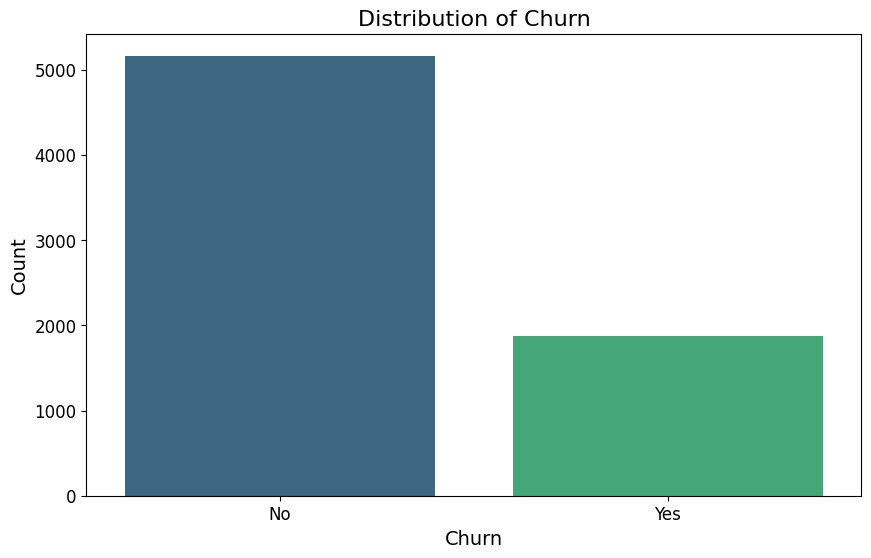

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_data, x='Churn', palette='viridis')
plt.title('Distribution of Churn', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The dataset looks highly imbalanced. It would help to use sampling methods before training the model to prevent bias.

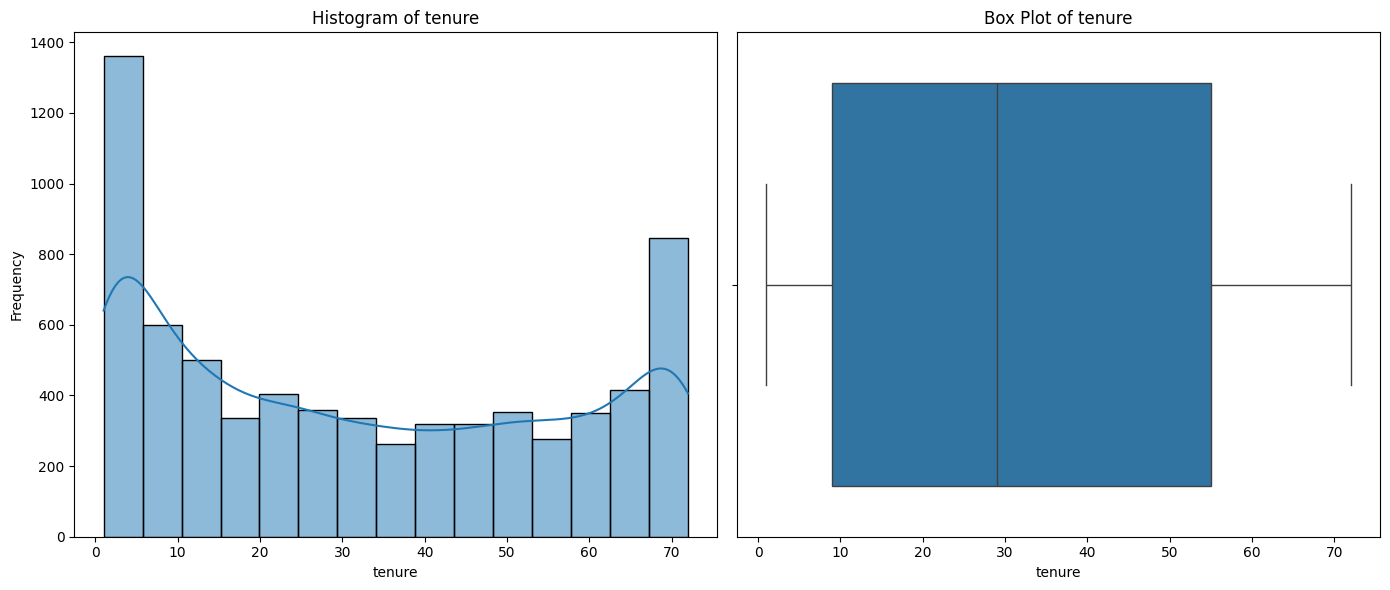

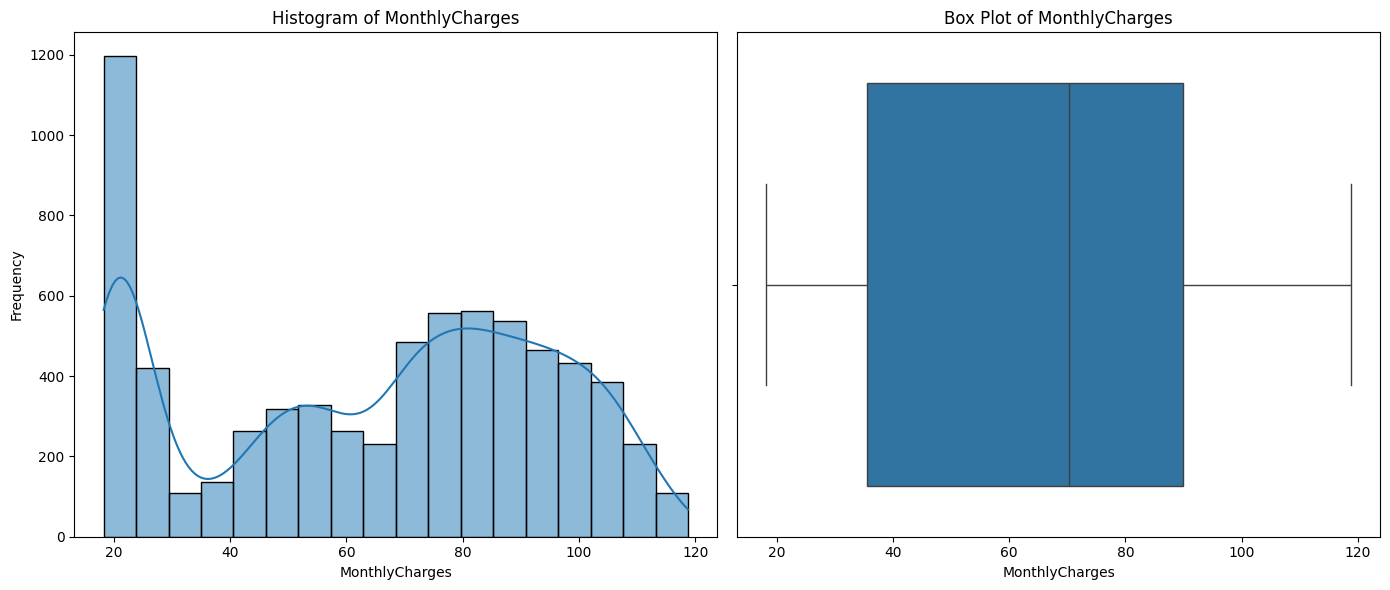

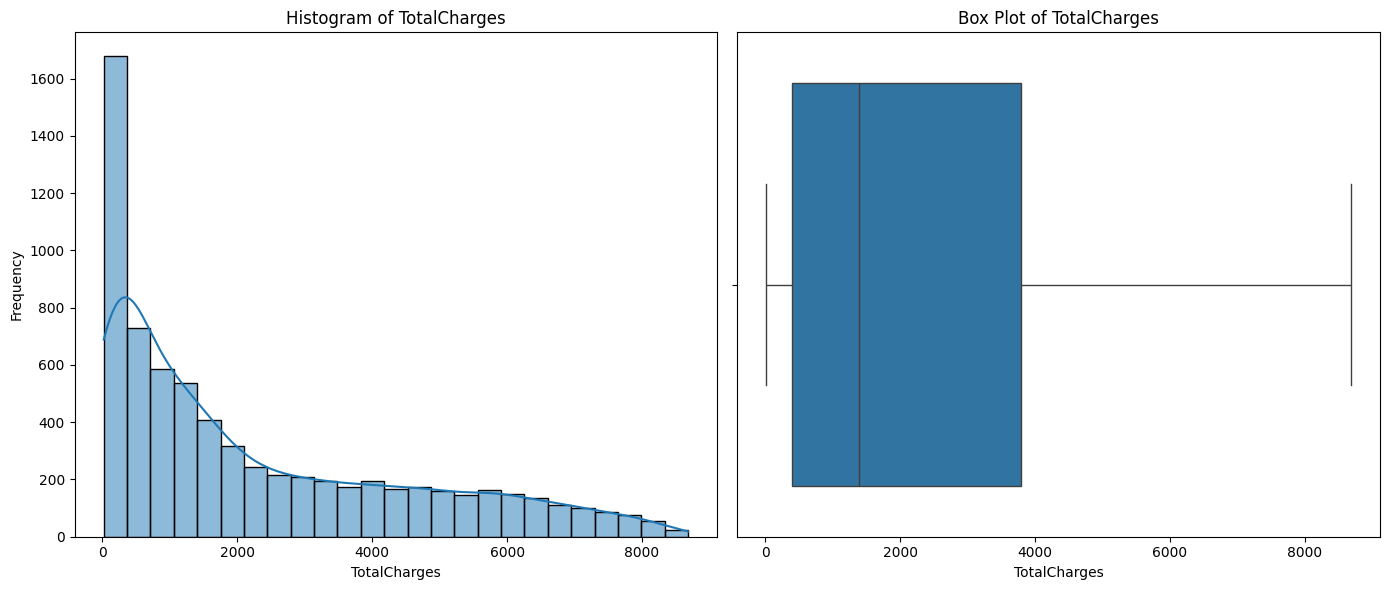

In [14]:
numerical_columns = new_data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(new_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=new_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

   TotalCharges  LogTotalCharges
0         29.85         3.429137
1       1889.50         7.544597
2        108.15         4.692723
3       1840.75         7.518471
4        151.65         5.028148


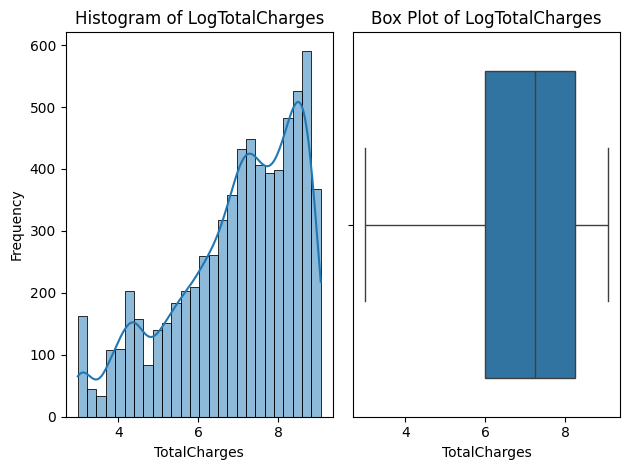

In [15]:
# Apply log transformation to TotalCharges
new_data['LogTotalCharges'] = np.log1p(new_data['TotalCharges'])

# Display the first few rows to verify the transformation
print(new_data[['TotalCharges', 'LogTotalCharges']].head())

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(new_data['LogTotalCharges'], kde=True)
plt.title(f'Histogram of LogTotalCharges')
plt.xlabel(column)
plt.ylabel('Frequency')
    
# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=new_data['LogTotalCharges'])
plt.title(f'Box Plot of LogTotalCharges')
plt.xlabel(column)
    
plt.tight_layout()
plt.show()

Key Takeaways:
- Tenure: There seems to be peaks conisting of new customers who could be the highest risk of churn and then the loyal customers who are at a lower risk of churn but special measures needs be taken reward their loyalty. There are no outliers so the data is consistent with have of the customers with the service for about 30 months and with a max 70 months tenure.

- Monthly Charges: We see a bimodal distribution here as well, there could be a good amount of people with a basic plan while another group of people with add-ons which could be the reason for the monthly charge ranging from 20-120. There are no outliers so data seems to be consistent.

- Total Charges: The total charges closely dpends on the tenure and the monthly charges the person has paid over the months. The histogram shows a highly right skewed distribution meaning the average of the total charge is much lesser than the total charge paid by 50% of the customers.
    

In [16]:
# Define the bins and labels
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '12-24', '24-36', '36-48', '48-60', '60-72']

# Create a new column 'tenure_bins' with the binned data
new_data['tenure_bins'] = pd.cut(new_data['tenure'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify the new column
print(new_data[['tenure', 'tenure_bins']].head())



   tenure tenure_bins
0       1        0-12
1      34       24-36
2       2        0-12
3      45       36-48
4       2        0-12


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


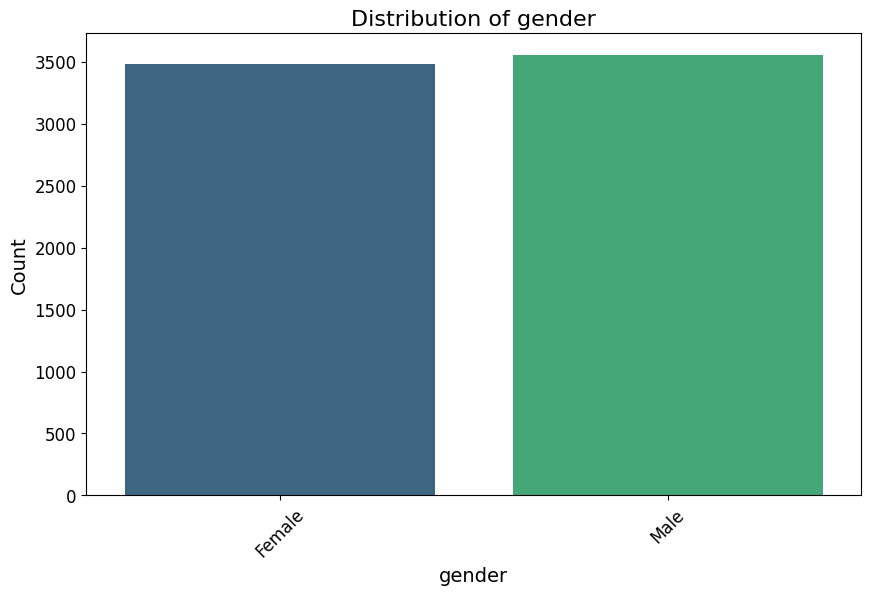

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


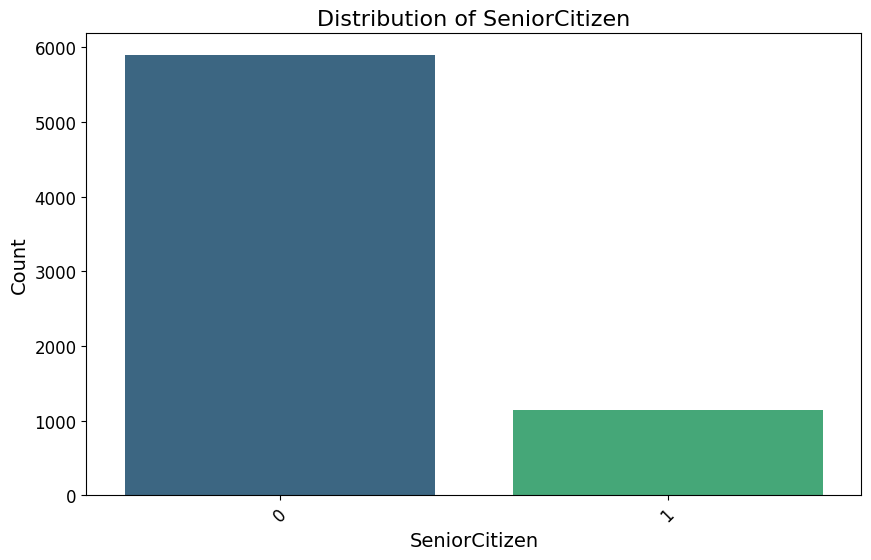

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


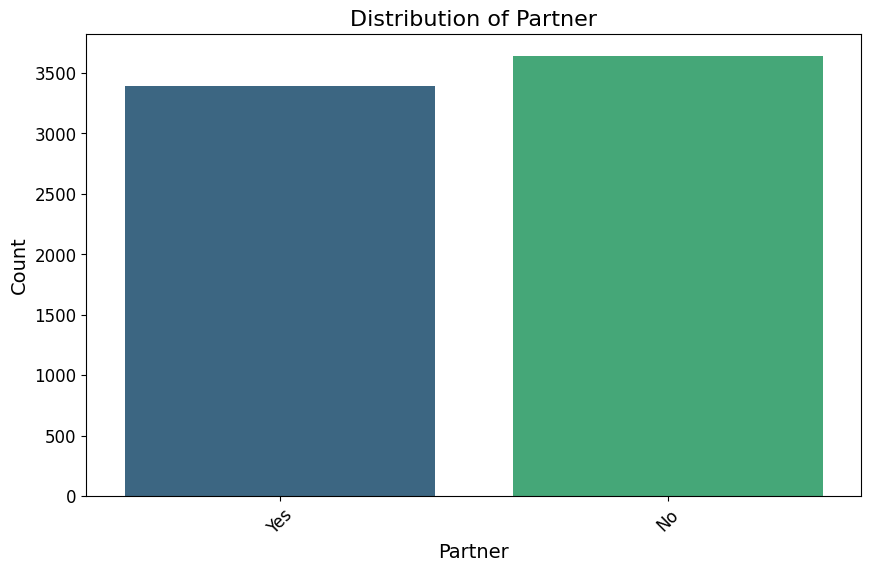

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


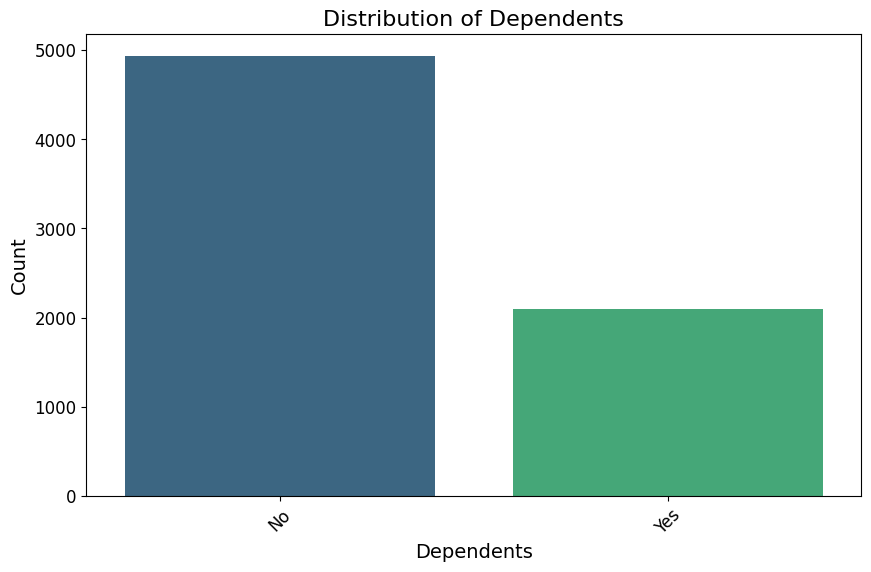

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


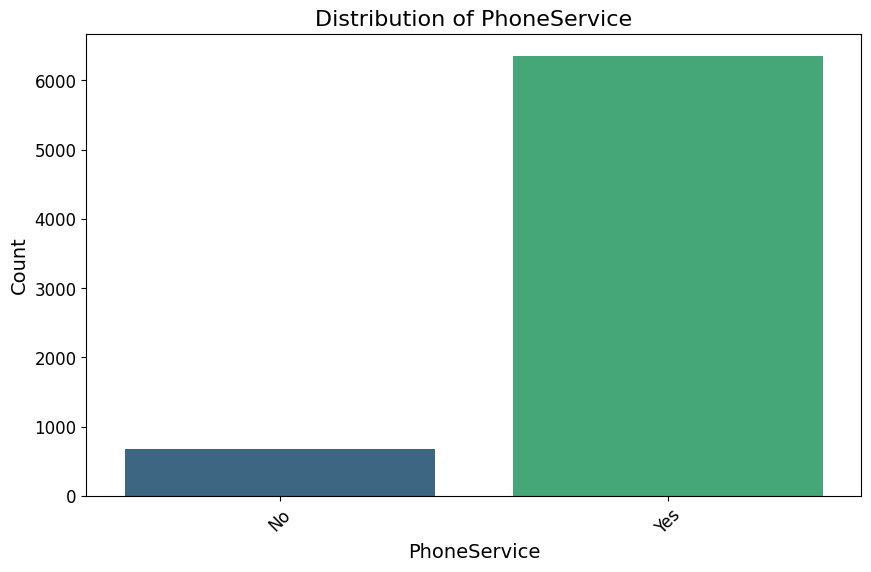

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


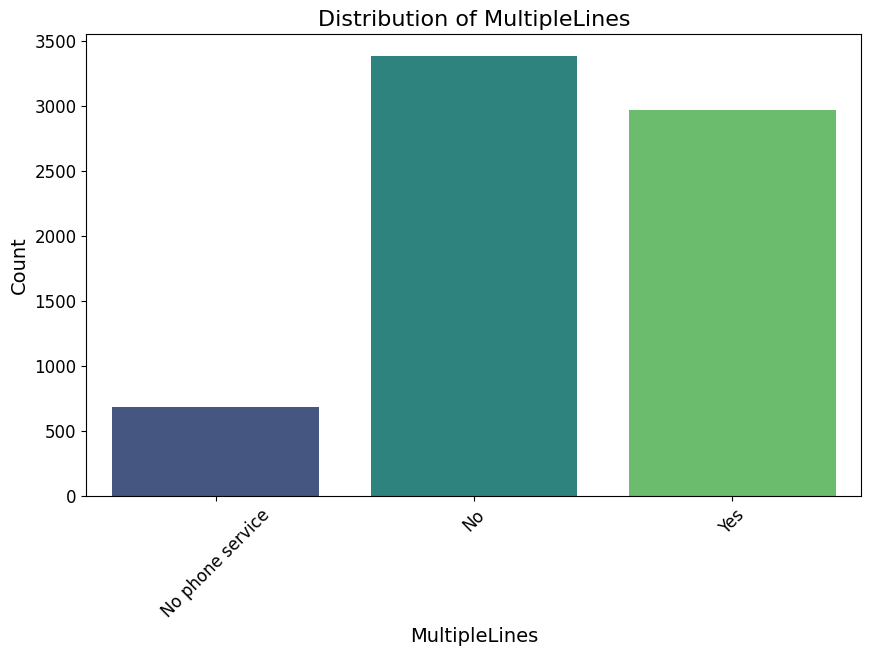

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


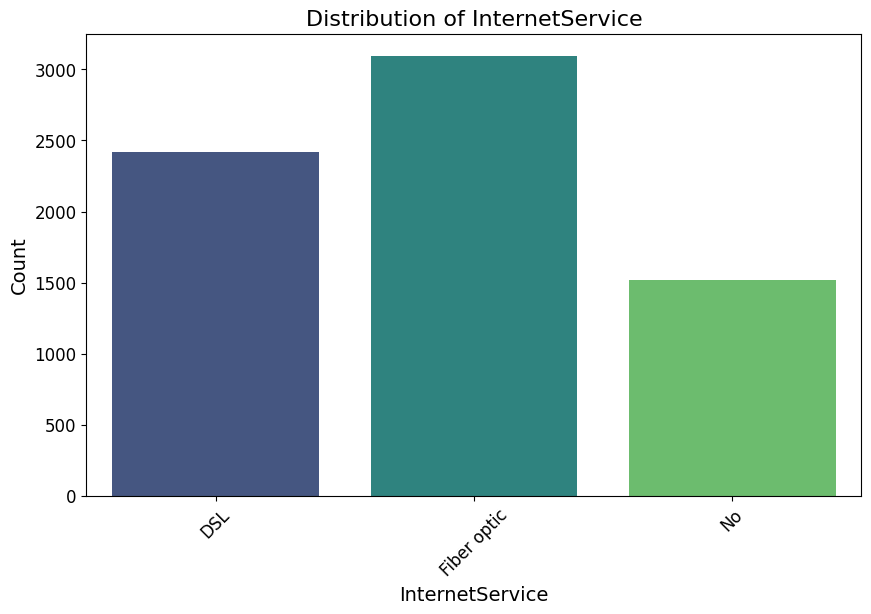

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


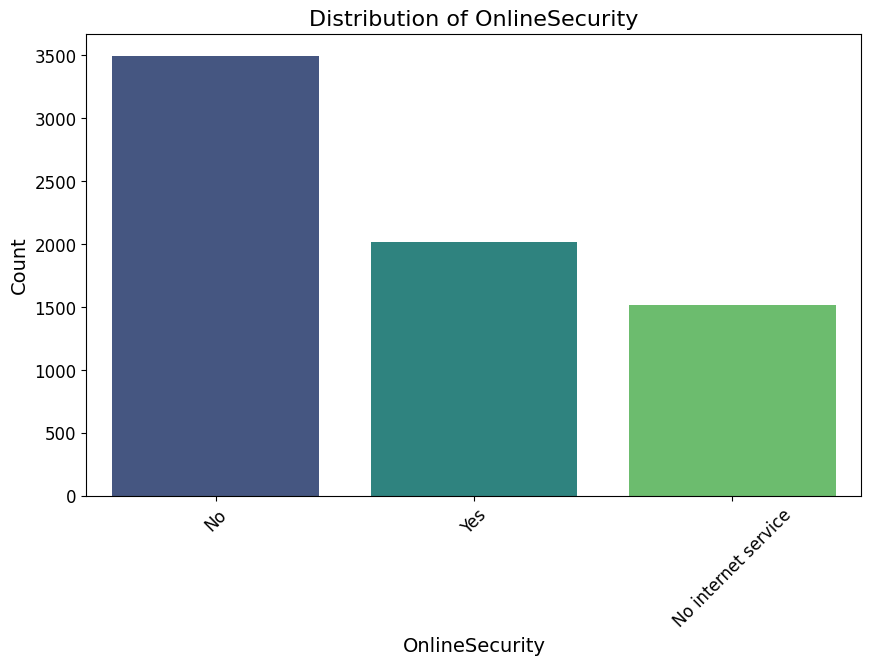

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


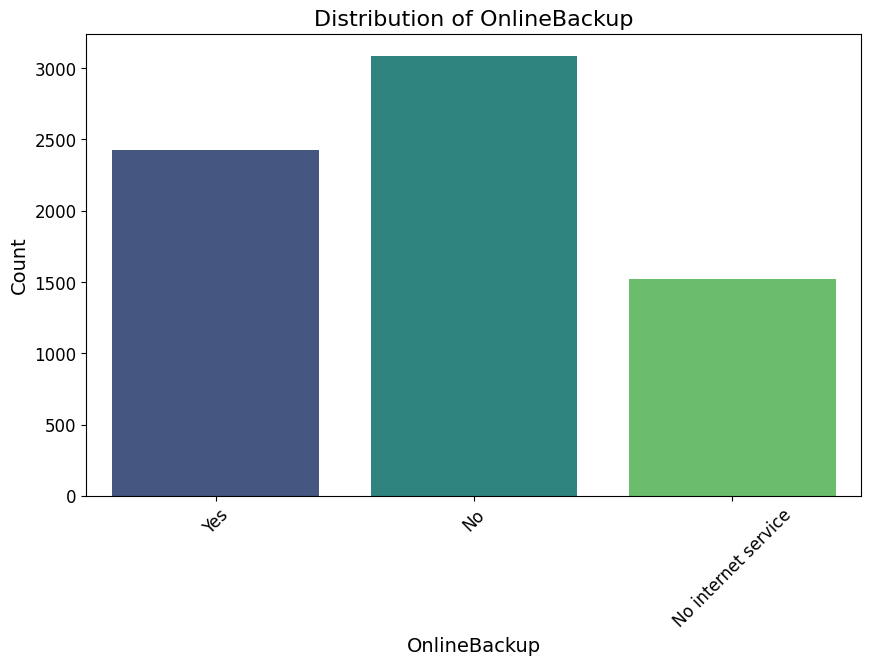

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


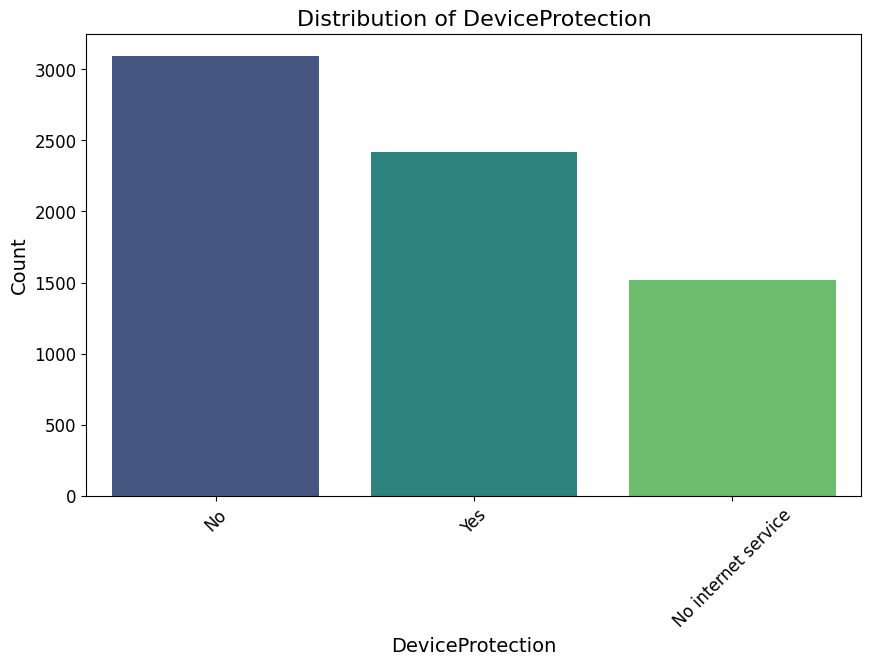

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


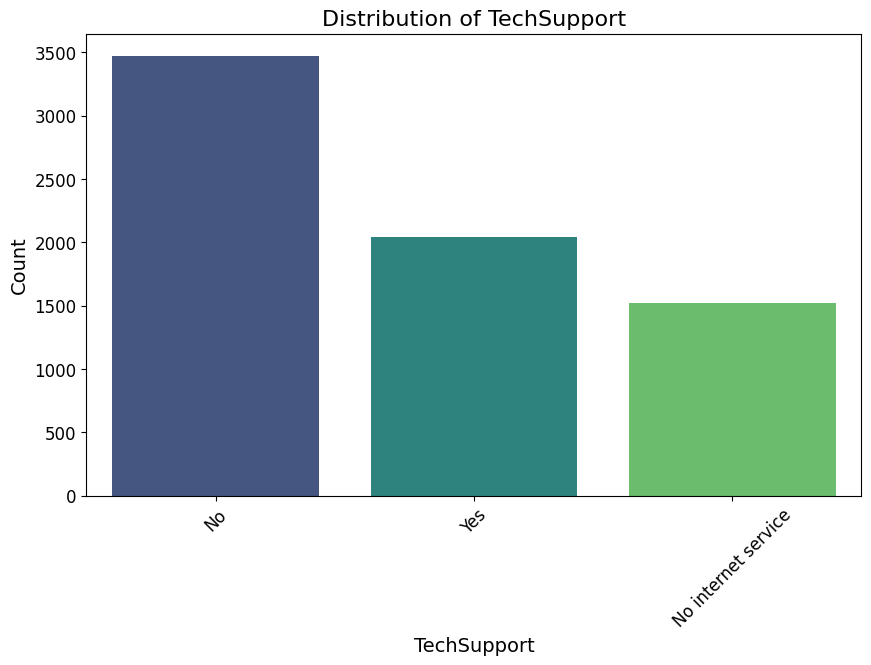

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


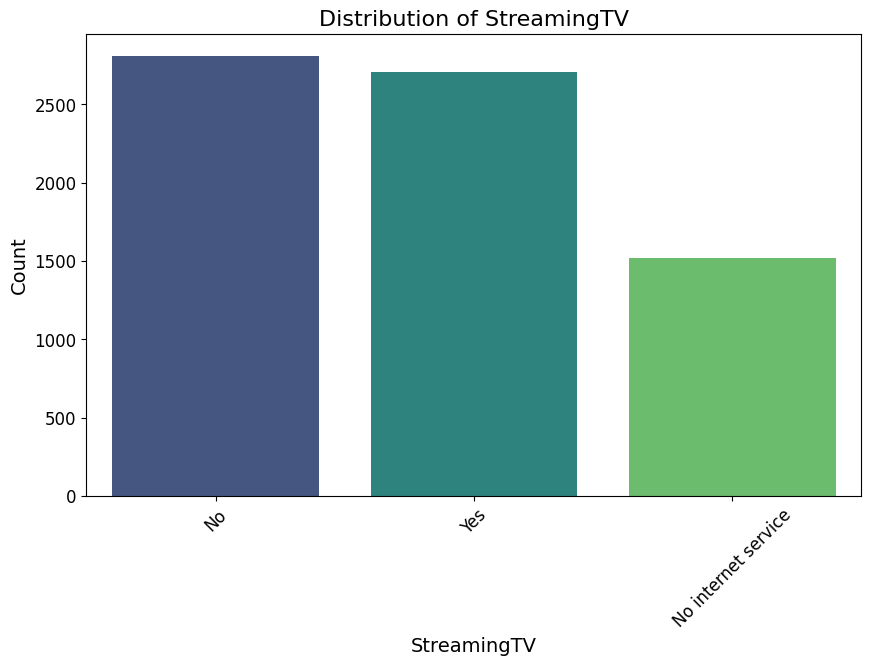

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


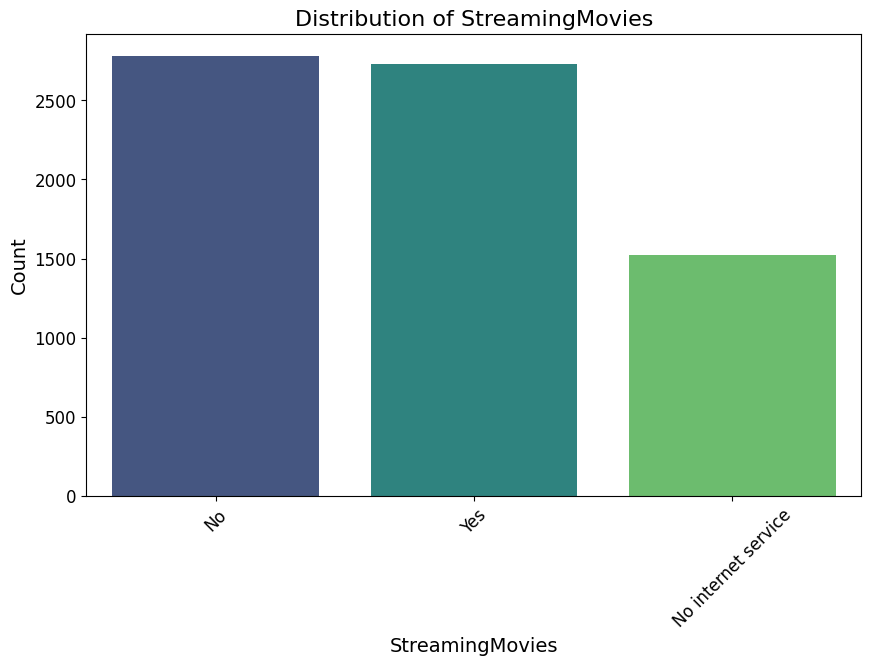

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


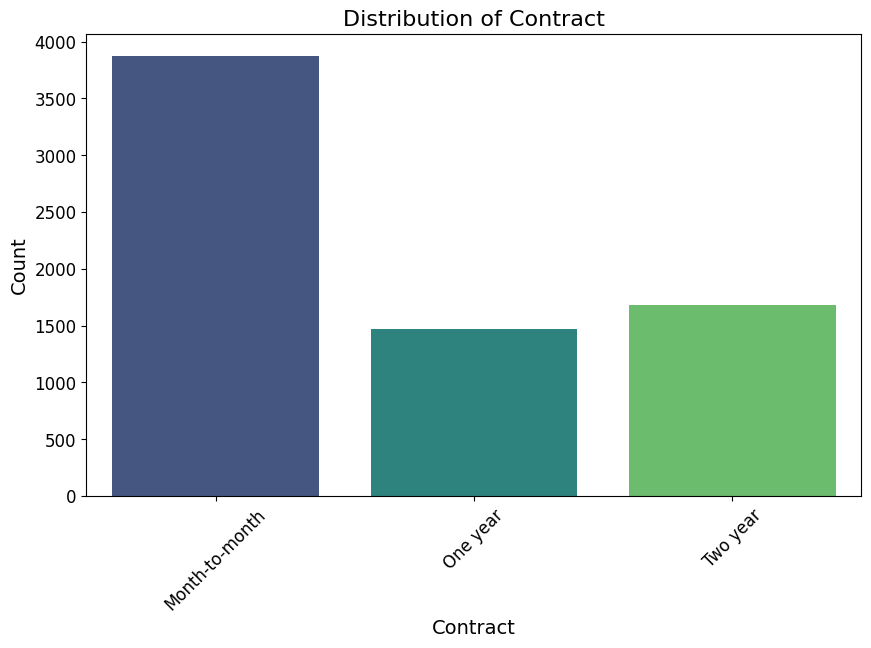

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


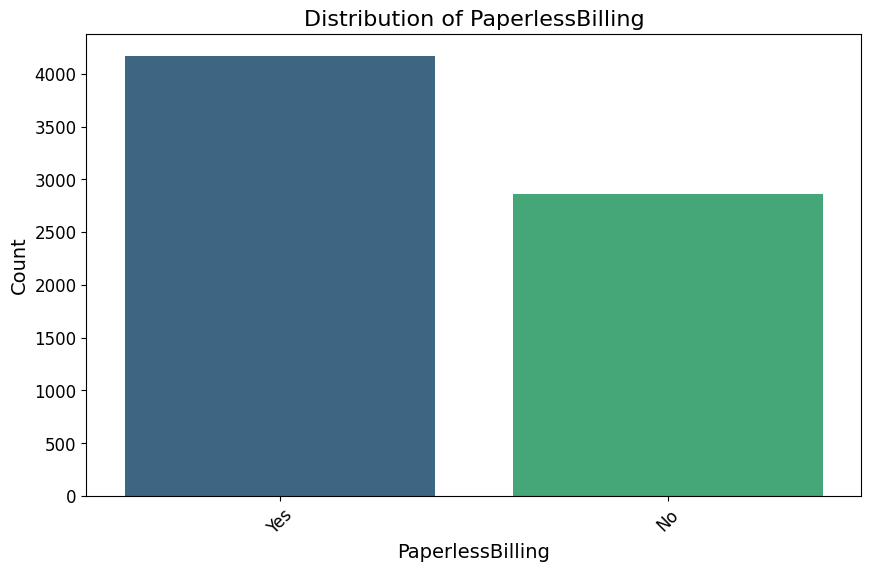

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


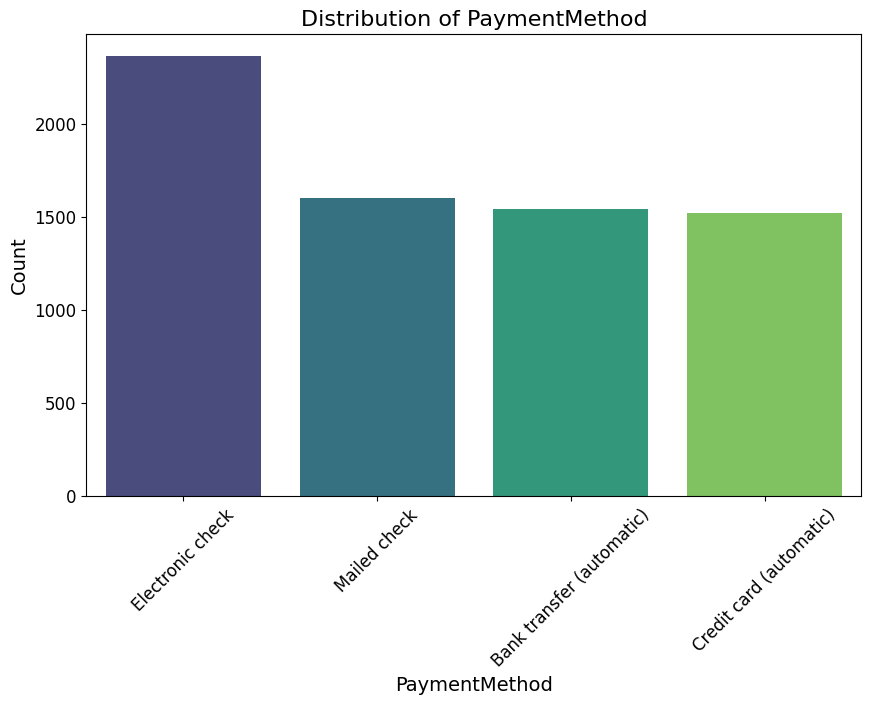

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


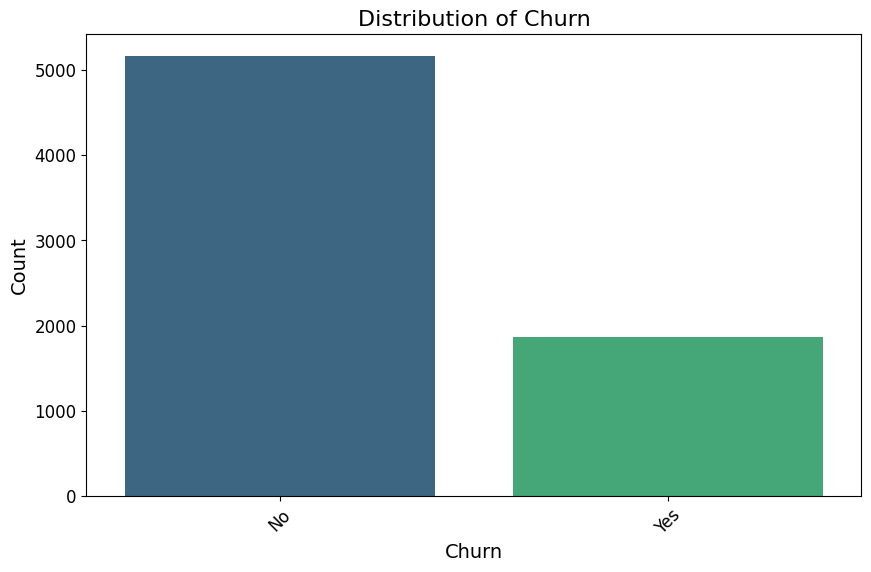

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_62623/731303308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


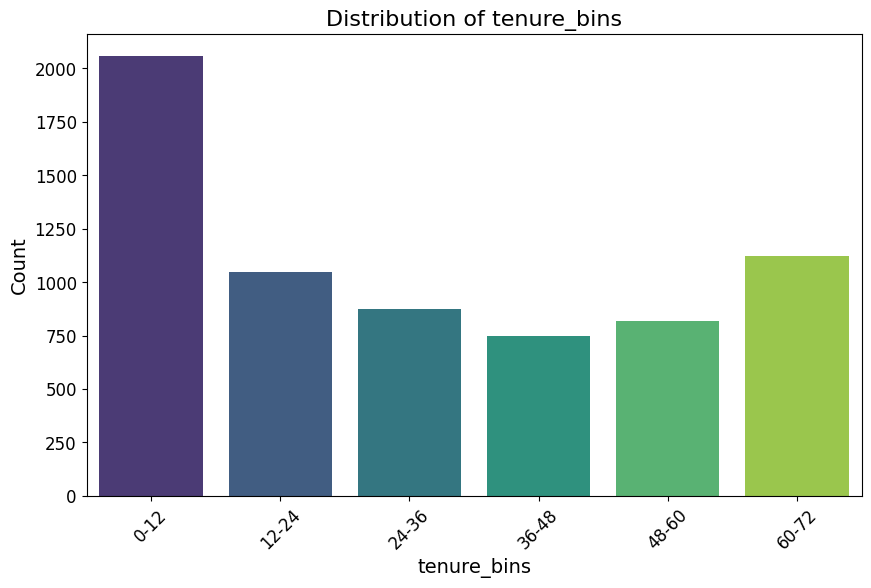

In [17]:
object_columns = new_data.select_dtypes(include='object').columns
print (object_columns)
object_columns = object_columns.append(pd.Index(['tenure_bins']))
for column in object_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=new_data, x=column, palette='viridis')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Key Takeaways:
- The data is balanced in terms of Gender.
- There are lesser Senior Citizens in the sample
- A good amount of cutomers do not have a partner or dependents.
- A majority of the customers have a phone service either with single or nultiple lines.
- Fiber Optic seems to be a popular choice among Internet services though most of them have not opted for add-ons like Online Backup, Online Security, Tech Support.
- Month-to-month contract seems to be another popular choice which could be considered as a factor for churn
- Most customers seem to making their payments through Electronic payment.
- The top 2 groups seem to be the ones within 1 year and the 6+ years group

### Bi-variate Analysis

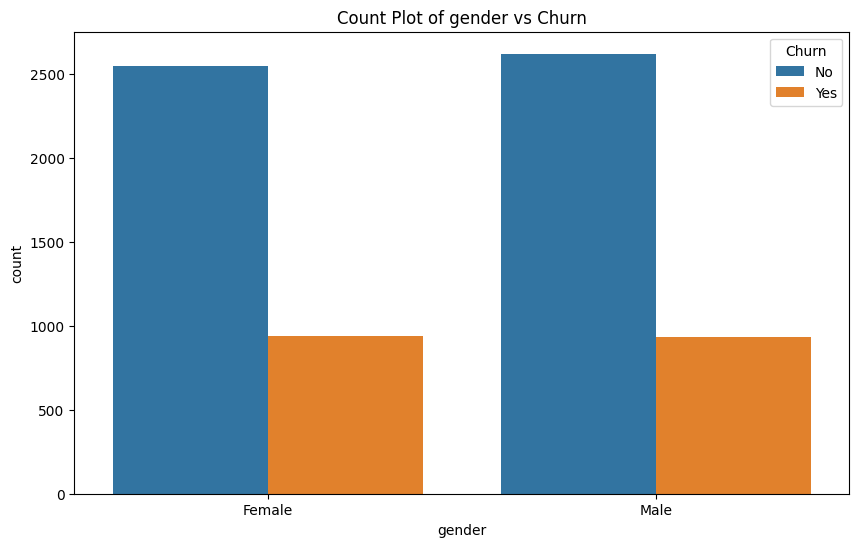

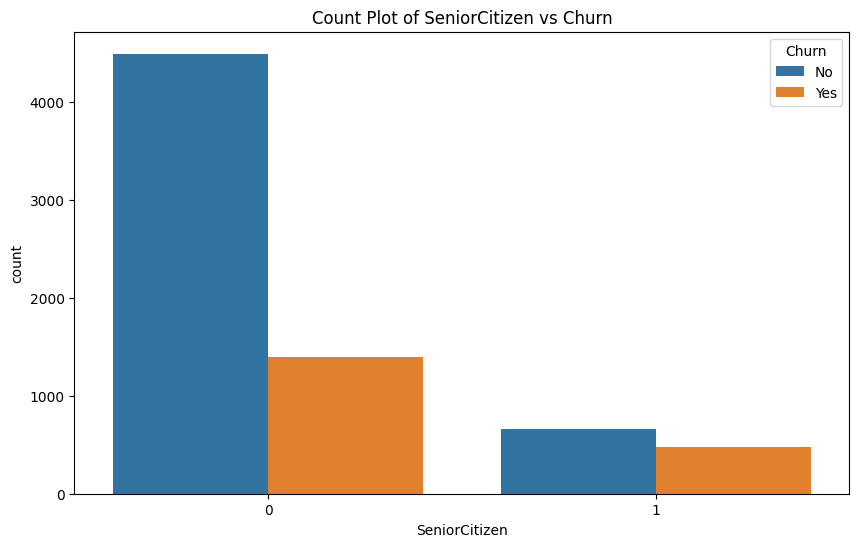

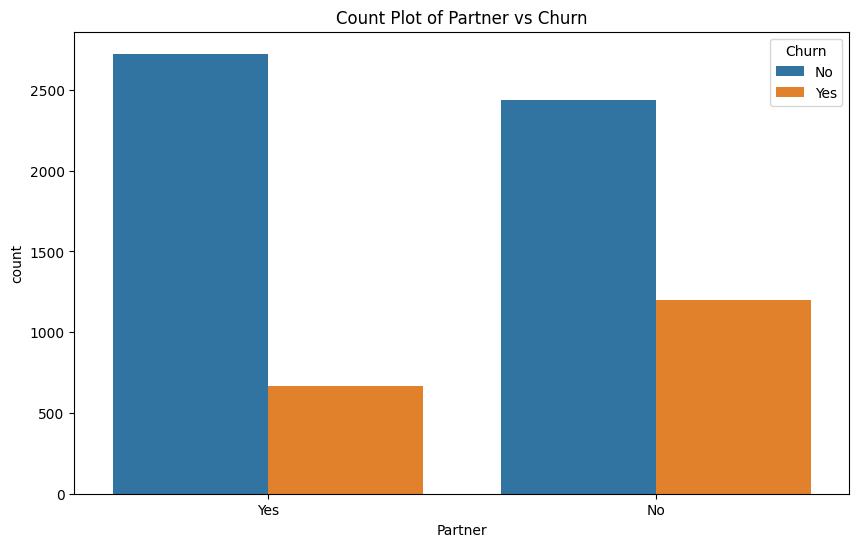

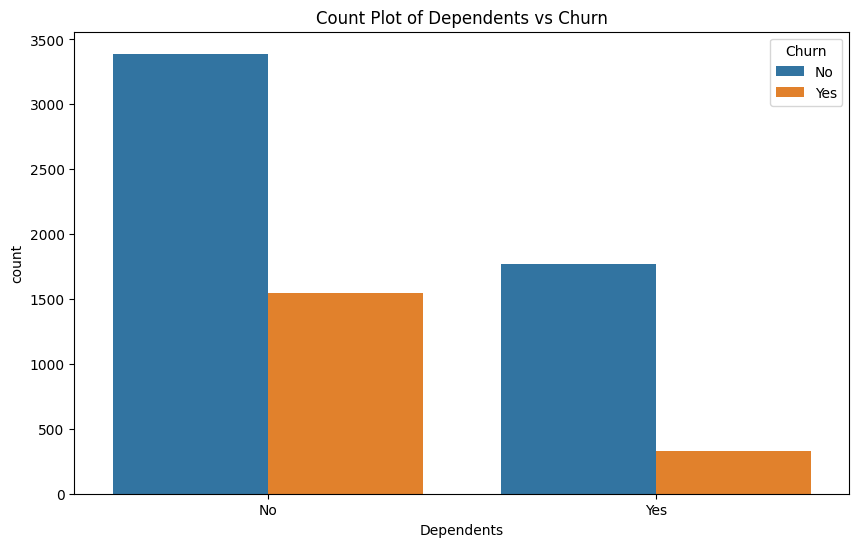

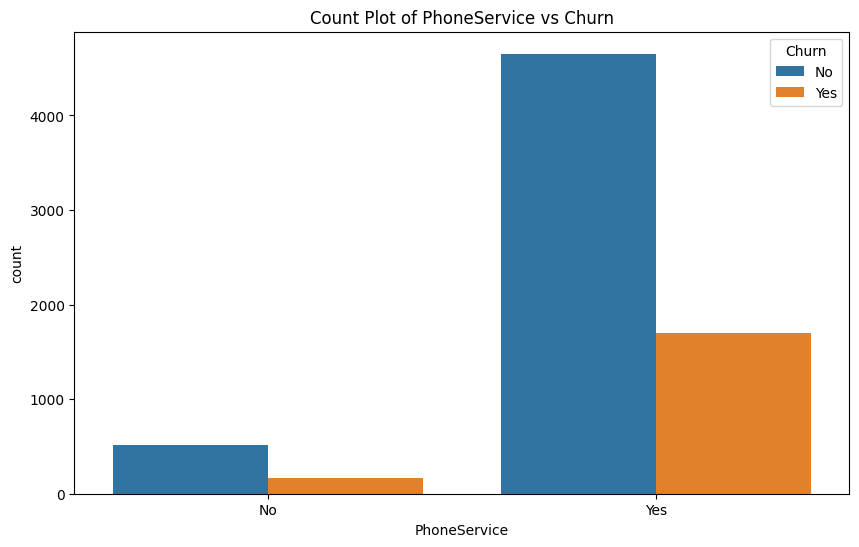

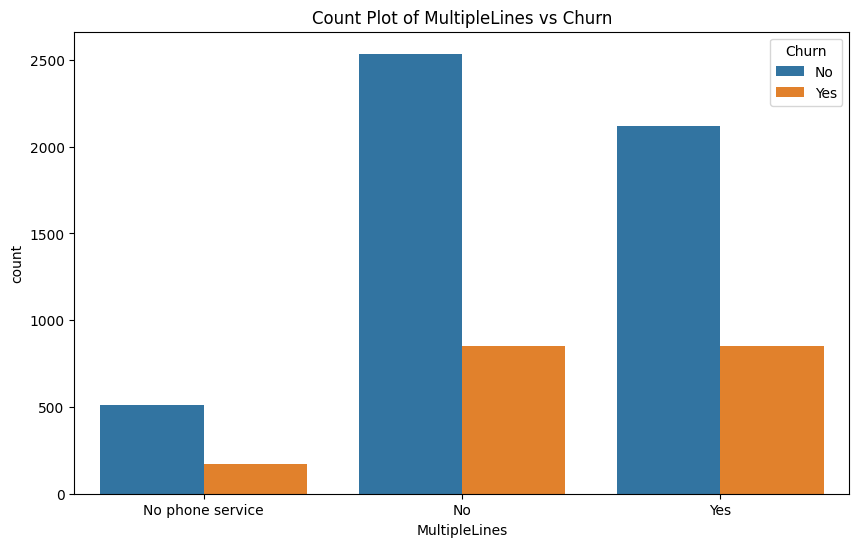

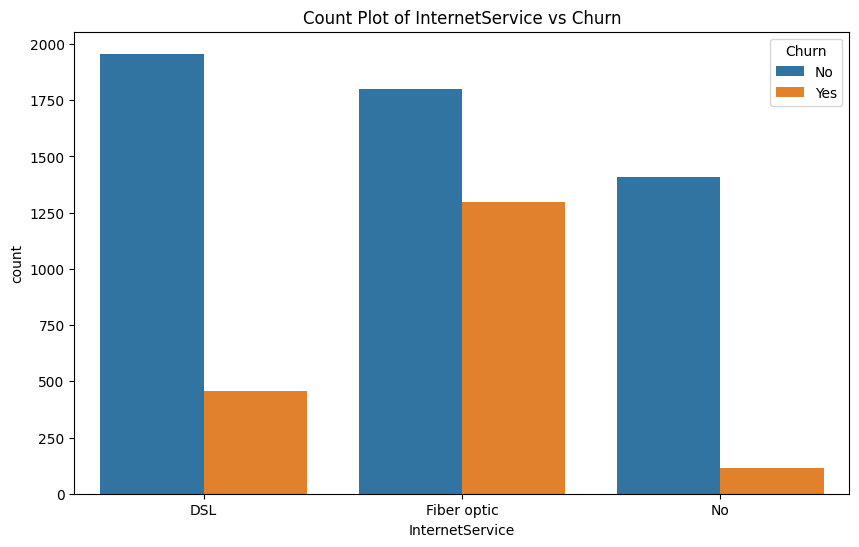

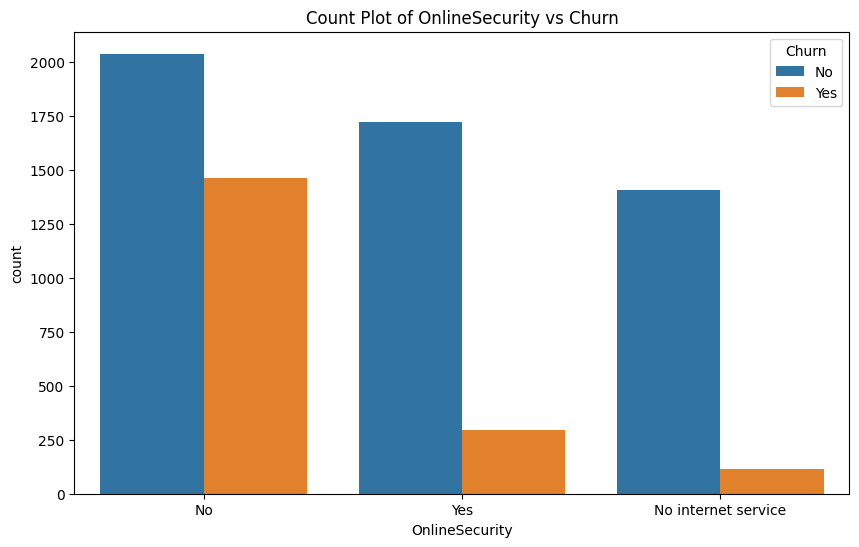

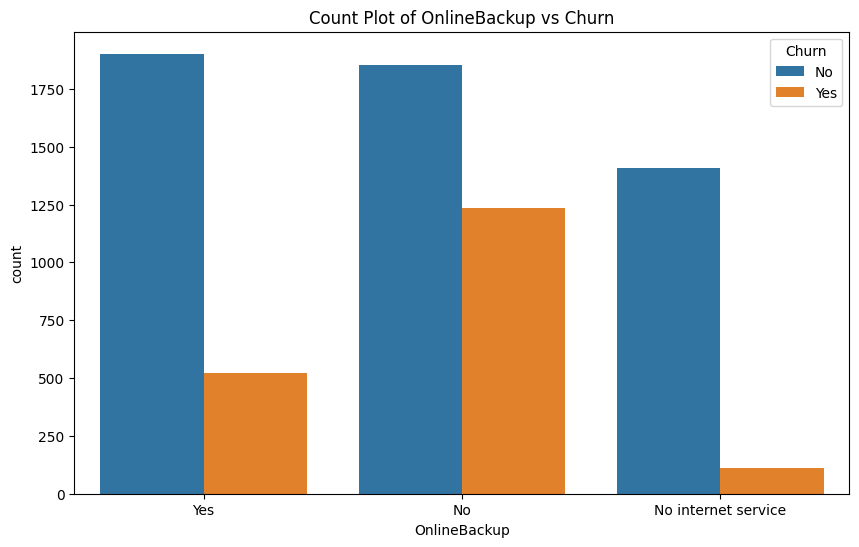

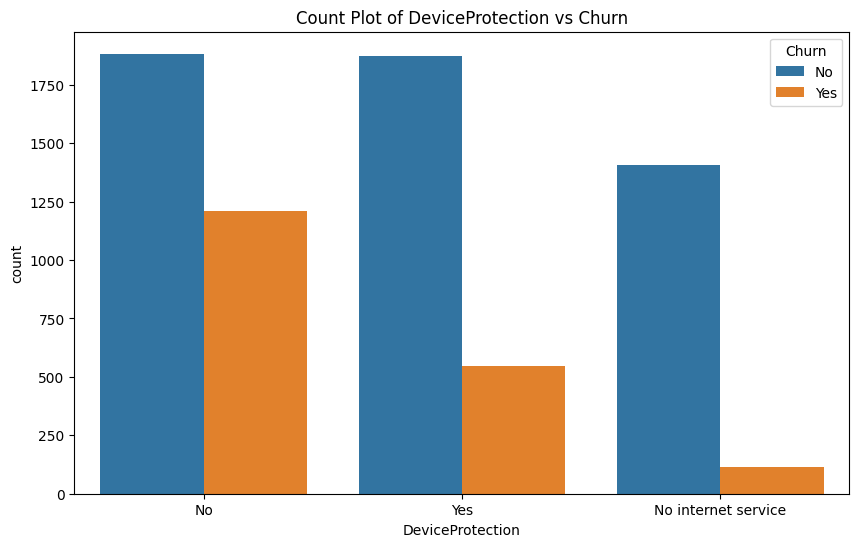

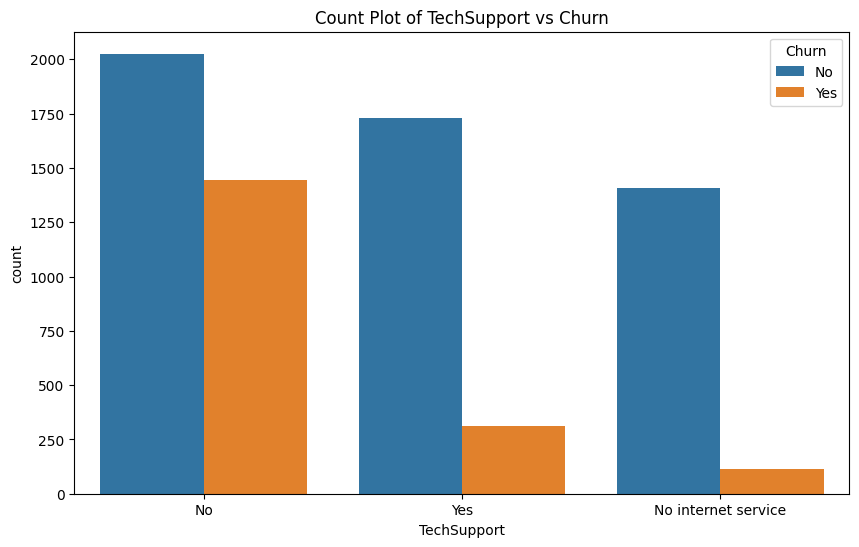

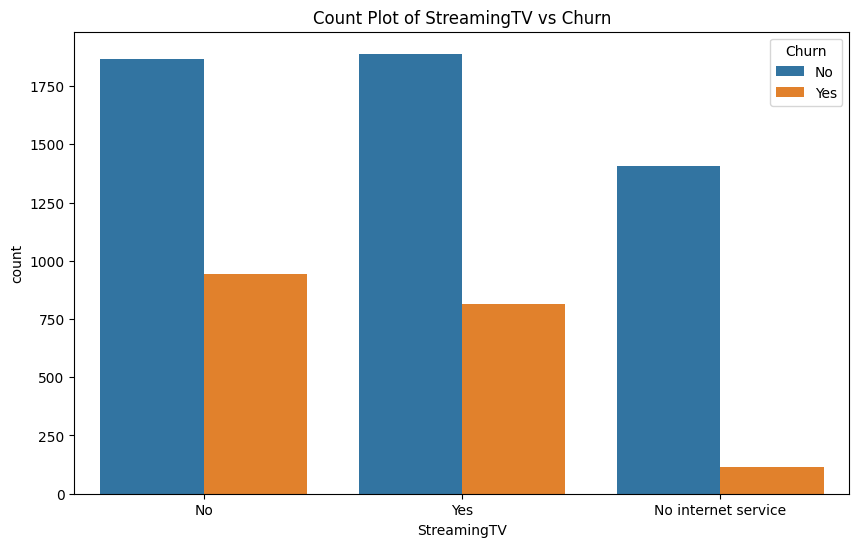

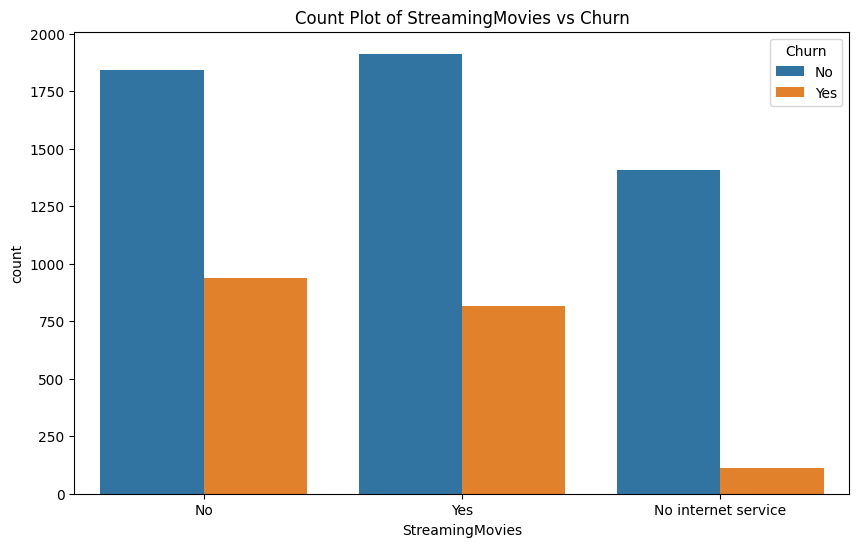

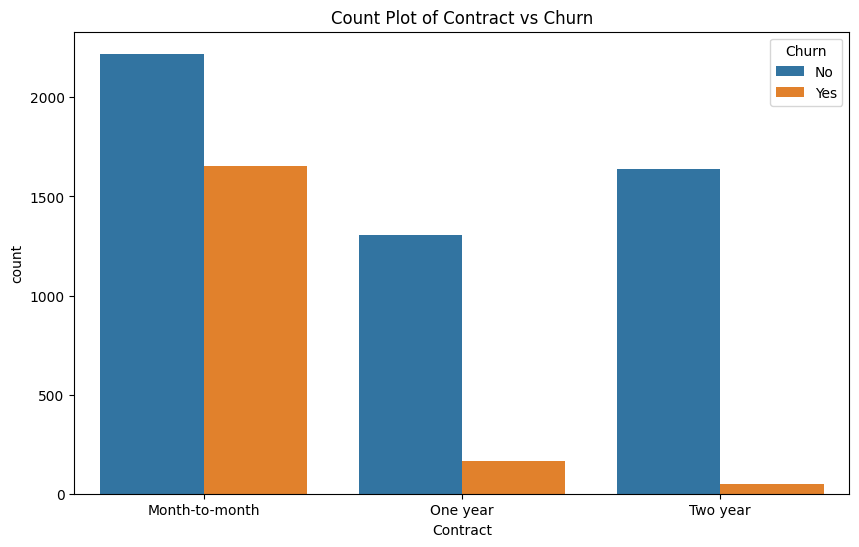

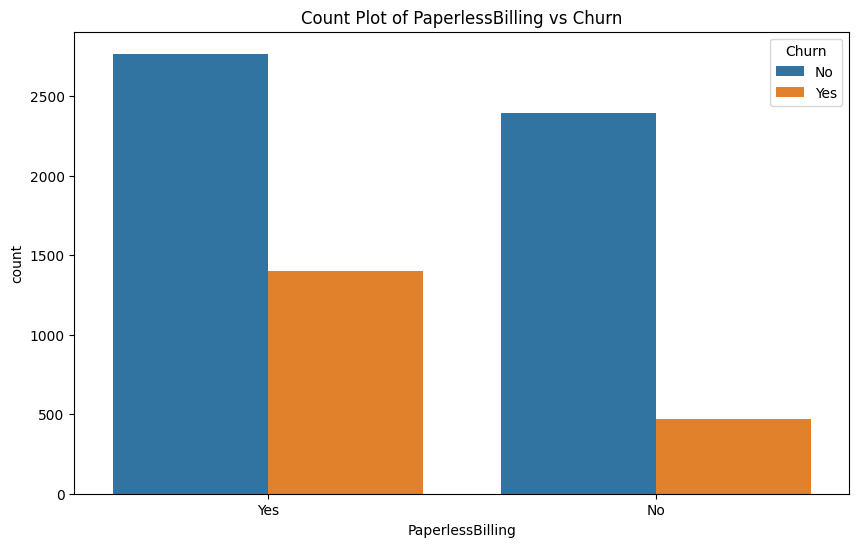

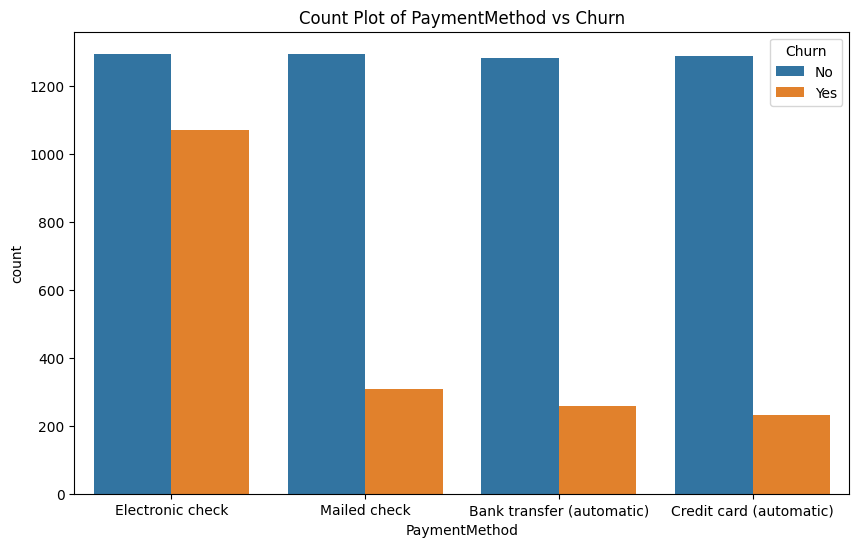

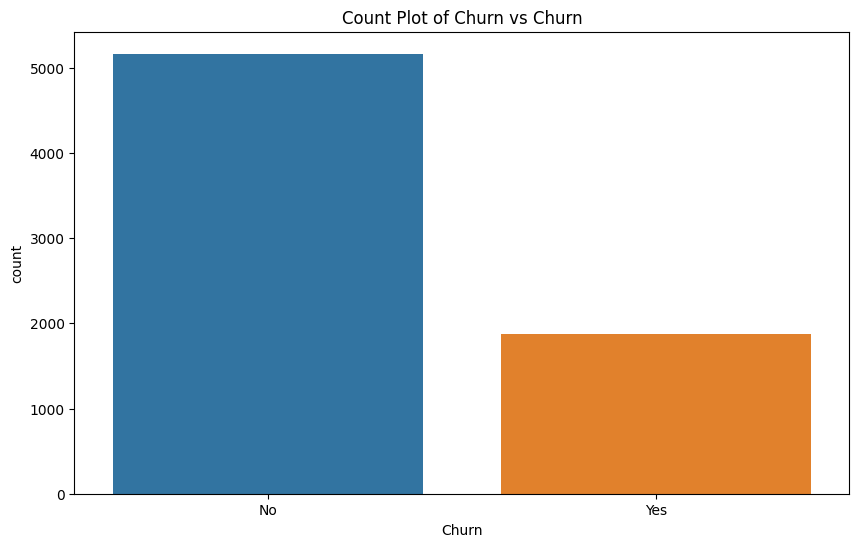

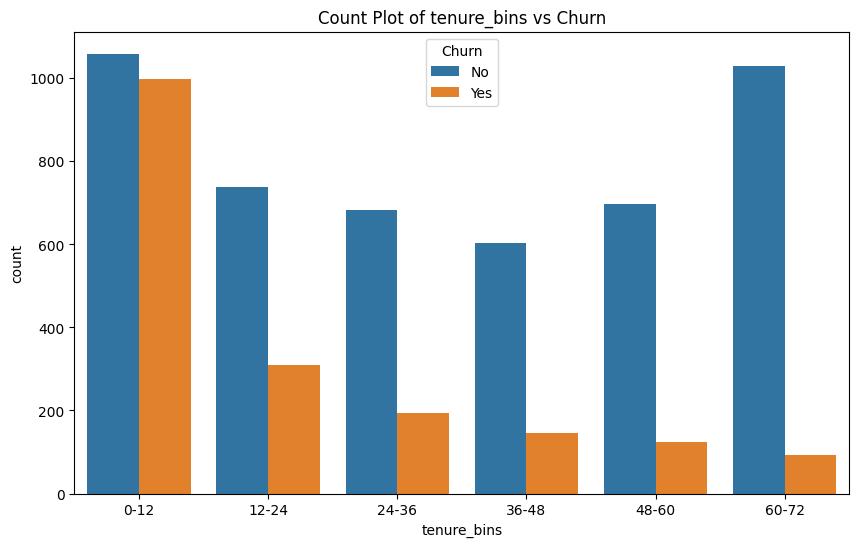

In [18]:
for column in object_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=new_data, x=column, hue='Churn')
    plt.title(f'Count Plot of {column} vs Churn')
    plt.show()

Key Takeaways:
- Churn seems to be higher among those who opted for Fiber Optics internet service. In addition, churn is also higher among those who have not opted for the add-ons.
- As expected the ones on a month-on-month contract and those who pay by electronic cheque are the ones with highest churn. Many companies offer discounts for auto-pay via credit/debit card which they might be missing which could make it less affordable. Opting for a manual payment option could also suggest their less usage of digital services.
- The new customers are the ones that seems to churn the highest as they are still trying to figure out their best deal.

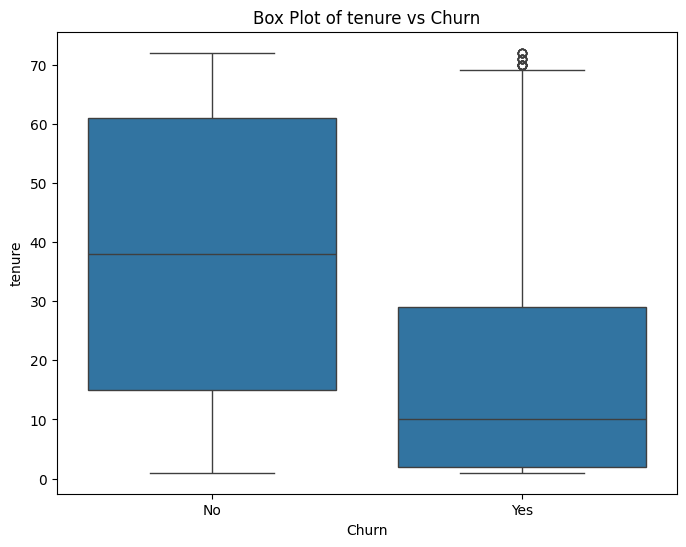

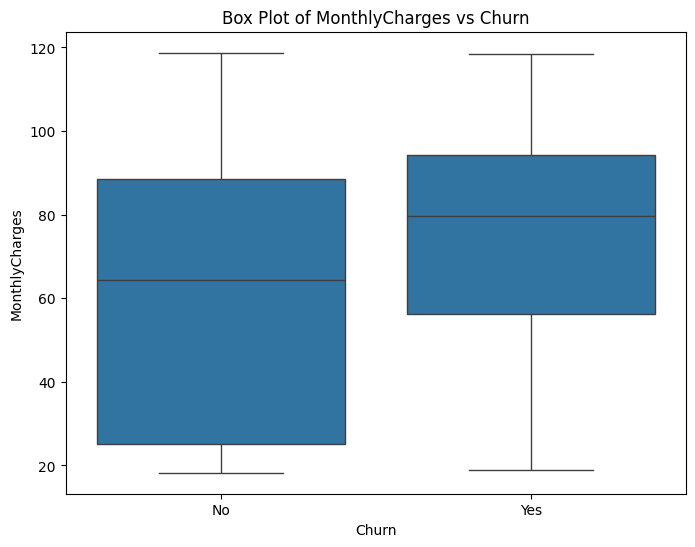

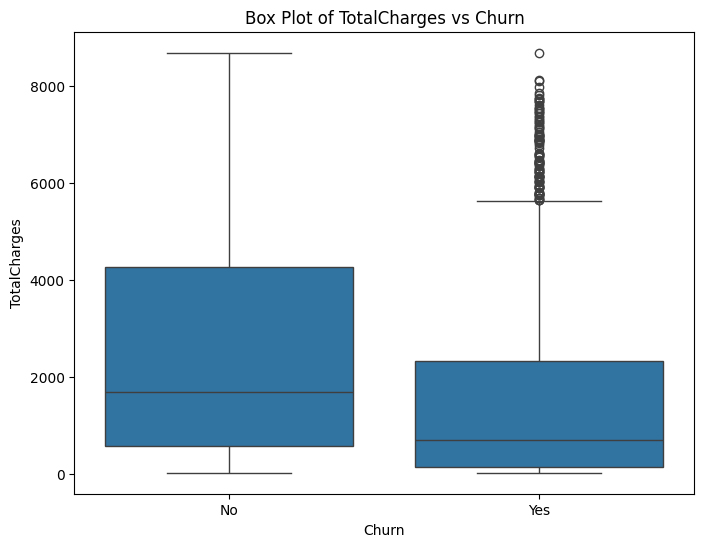

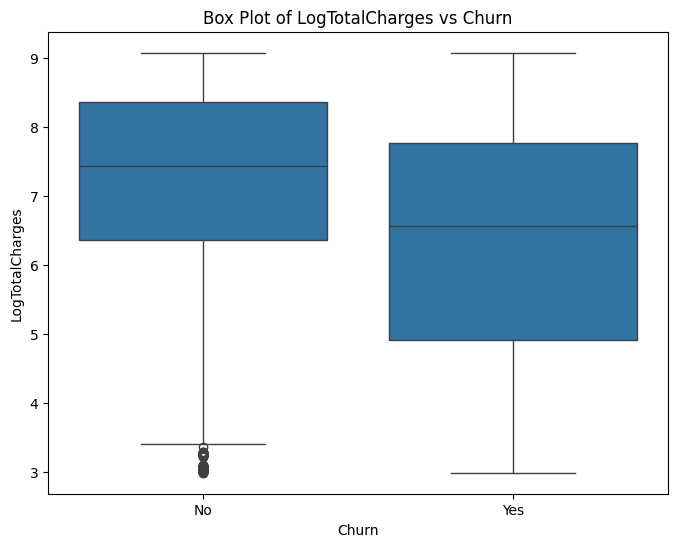

In [19]:
# Identify numerical columns
numerical_columns = new_data.select_dtypes(include=[np.number]).columns

# Perform bivariate analysis on numerical columns vs Churn
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=column, data=new_data)
    plt.title(f'Box Plot of {column} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.show()

Key Takeaways:
- The churn seems to higher among the new customers who are attaches with the company/product.
- Higher monthly charges is a factor which leads them to look for other products with competitive prices.
- Churn among the lower total charge is dependent on tenure making the new customers the target to impress to reduce churn.

### Feature Correlation Analysis

                   tenure  MonthlyCharges  TotalCharges  LogTotalCharges
tenure           1.000000        0.246862      0.825880         0.833932
MonthlyCharges   0.246862        1.000000      0.651065         0.574763
TotalCharges     0.825880        0.651065      1.000000         0.832262
LogTotalCharges  0.833932        0.574763      0.832262         1.000000


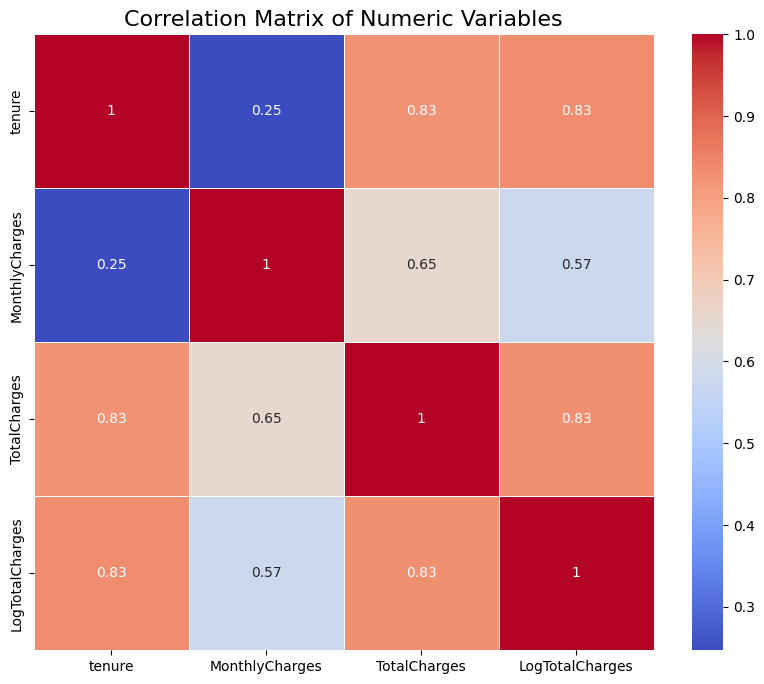

In [20]:
correlation_matrix = new_data[numerical_columns].corr()
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=16)
plt.show()

The correlation plot proves the relation between tenure and total charges

#### Chi-Square Test for Categorical Variables

In [21]:
from scipy.stats import chi2_contingency


# Perform Chi-square test for each categorical variable against 'Churn'
for column in object_columns:
    contingency_table = pd.crosstab(new_data[column], new_data['Churn'])
    print(contingency_table)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {column} vs Churn:")
    print(f"Chi2 Statistic: {chi2}, p-value: {p}")
    if p < 0.05:
        print(f"There is a signicant relationship between {column} and Churn \n")
    else:
        print(f"There is no signicant relationship between {column} and Churn \n")

Churn     No  Yes
gender           
Female  2544  939
Male    2619  930
Chi-square test for gender vs Churn:
Chi2 Statistic: 0.47545453727386294, p-value: 0.4904884707065509
There is no signicant relationship between gender and Churn 

Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476
Chi-square test for SeniorCitizen vs Churn:
Chi2 Statistic: 158.4408162893713, p-value: 2.4792557203954705e-36
There is a signicant relationship between SeniorCitizen and Churn 

Churn      No   Yes
Partner            
No       2439  1200
Yes      2724   669
Chi-square test for Partner vs Churn:
Chi2 Statistic: 157.50315146557506, p-value: 3.9737975745159094e-36
There is a signicant relationship between Partner and Churn 

Churn         No   Yes
Dependents            
No          3390  1543
Yes         1773   326
Chi-square test for Dependents vs Churn:
Chi2 Statistic: 186.32163933855873, p-value: 2.0196592017051303e-42
There is a signicant relationshi

Based on the results of the Chi-square Test it looks like Gender and Phone service do not play and important role in Churn and can hence be dropped from the predictive model features.

##### Dropping Gender, Total Charges and Phone Service 

In [22]:
# Create a new dataframe and drop gender and TotalCharges
transdf = new_data.drop(columns=['gender', 'TotalCharges','PhoneService','tenure','LogTotalCharges'])

### Applying Classification Models

#### Logistic Regression

Encoding categorical variables for Logistic Regression

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Encode categorical variables
encoded_data = pd.get_dummies(transdf, drop_first=True)
print(encoded_data.head())

# Define features and target variable
X = encoded_data.drop(columns=['Churn_Yes'])
y = encoded_data['Churn_Yes']
X.head()

   MonthlyCharges  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
0           29.85            False         True           False   
1           56.95            False        False           False   
2           53.85            False        False           False   
3           42.30            False        False           False   
4           70.70            False        False           False   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                            True              False   
1                           False              False   
2                           False              False   
3                            True              False   
4                           False              False   

   InternetService_Fiber optic  InternetService_No  \
0                        False               False   
1                        False               False   
2                        False               False   
3                        False              

,MonthlyCharges,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bins_12-24,tenure_bins_24-36,tenure_bins_36-48,tenure_bins_48-60,tenure_bins_60-72
0,29.85,False,True,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,56.95,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
2,53.85,False,False,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
3,42.30,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,70.70,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logreg = LogisticRegression(max_iter=1500)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best model
best_logreg = grid_search.best_estimator_

# Train the best model
best_logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_logreg.predict(X_test_scaled)

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7839374555792467
Confusion Matrix:
 [[922 111]
 [193 181]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [27]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Display the shape of the resampled data
print(f"Original training set shape: {X_train.shape}")
print(f"Resampled training set shape: {X_train_smote.shape}")

Original training set shape: (5625, 31)
Resampled training set shape: (8260, 31)


In [28]:
from sklearn.metrics import recall_score

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logreg = LogisticRegression(max_iter=1000,class_weight='balanced')
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_smote, y_train_smote)

# Best model
best_logreg = grid_search.best_estimator_

# Train the best model
best_logreg.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = best_logreg.predict(X_test_scaled)


# Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_pred_prob = best_logreg.predict_proba(X_test_scaled)[:, 1]
y_pred_threshold = (y_pred_prob >= 0.4).astype(int)  # Lowering the threshold to 0.4

print("Accuracy at 0.4 threshold:", accuracy_score(y_test, y_pred_threshold))
print("Confusion Matrix at 0.4 threshold:\n", confusion_matrix(y_test, y_pred_threshold))
print("Classification Report at 0.4 threshold:\n", classification_report(y_test, y_pred_threshold))

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7320540156361052
Confusion Matrix:
 [[737 296]
 [ 81 293]]
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.71      0.80      1033
        True       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

Accuracy at 0.4 threshold: 0.6844349680170576
Confusion Matrix at 0.4 threshold:
 [[638 395]
 [ 49 325]]
Classification Report at 0.4 threshold:
               precision    recall  f1-score   support

       False       0.93      0.62      0.74      1033
        True       0.45      0.87      0.59       374

    accuracy                           0.68      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.80      0.68      0.70      1407



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Hyperparameter tuning using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', {0: 1, 1: 5}]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Display the shape of the resampled data
print(f"Original training set shape: {X_train.shape}")
print(f"Resampled training set shape: {X_resampled.shape}")
grid_search_rf.fit(X_resampled, y_resampled)

# Best model
best_rf_model = grid_search_rf.best_estimator_

# Train the best model
best_rf_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the model
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best))


y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_pred_prob >= 0.4).astype(int)  # Lowering the threshold to 0.4

print("Accuracy at 0.4 threshold:", accuracy_score(y_test, y_pred_threshold))
print("Confusion Matrix at 0.4 threshold:\n", confusion_matrix(y_test, y_pred_threshold))
print("Classification Report at 0.4 threshold:\n", classification_report(y_test, y_pred_threshold))


Accuracy: 0.7533759772565742
Confusion Matrix:
 [[892 141]
 [206 168]]
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.86      0.84      1033
        True       0.54      0.45      0.49       374

    accuracy                           0.75      1407
   macro avg       0.68      0.66      0.66      1407
weighted avg       0.74      0.75      0.75      1407

Original training set shape: (5625, 31)
Resampled training set shape: (8260, 31)
Best Parameters: {'bootstrap': False, 'class_weight': {0: 1, 1: 5}, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.7469793887704336
Confusion Matrix:
 [[824 209]
 [147 227]]
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.80      0.82      1033
        True       0.52      0.61      0.56       374

    accuracy                           0.75      1407
   macro avg       0.68      0.

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Perform GridSearchCV
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Best model
#best_xgb_model = grid_search.best_estimator_

# Make predictions
#y_pred_xgb = best_xgb_model.predict(X_test)


# Evaluate the model
#print("Best Parameters:", grid_search.best_params_)
#print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
#print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.7725657427149965
Confusion Matrix:
 [[892 141]
 [179 195]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.86      0.85      1033
        True       0.58      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407



In [105]:
import xgboost as xgb
from xgboost.callback import EarlyStopping, EvaluationMonitor
print(xgb.__version__)

# Use the EvaluationMonitor callback
print_evaluation = EvaluationMonitor()

2.1.3


In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost model with desired hyperparameters
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', learning_rate=0.01, max_depth=5, n_estimators=25, subsample=0.8, colsample_bytree=0.8, gamma=5, reg_lambda=0.5, alpha=0.5)

# Apply SMOTE to balance the dataset
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.7292110874200426
Confusion Matrix:
 [[744 289]
 [ 92 282]]
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.72      0.80      1033
        True       0.49      0.75      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.78      0.73      0.74      1407



In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_smote, y_train_smote)

# Best model
best_knn = grid_search_knn.best_estimator_

# Train the best model
best_knn.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_knn_best = best_knn.predict(X_test_scaled)

# Evaluate the model
print("Best Parameters:", grid_search_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_best))
print("Classification Report:\n", classification_report(y_test, y_pred_knn_best))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.7057569296375267
Confusion Matrix:
 [[792 241]
 [173 201]]
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.77      0.79      1033
        True       0.45      0.54      0.49       374

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.71      0.71      1407



In [161]:
import pickle
import os

# Ensure the models directory exists
os.makedirs('../models', exist_ok=True)

# Save the best performing Logistic Regression model to a pickle file
with open('../models/best_logreg_model.pkl', 'wb') as file:
    pickle.dump(best_logreg, file)